In [2]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

# Step 1: Load the CSV file with the correct encoding
df = pd.read_csv('reviews.csv', encoding='ISO-8859-1')  # Load dataset 

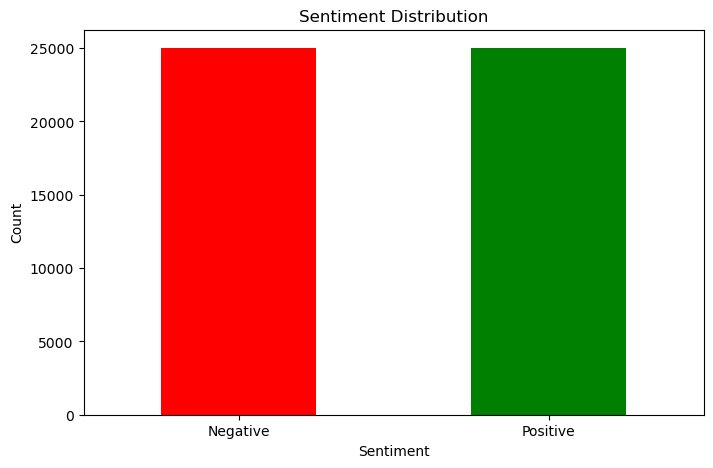

In [47]:

# 1. Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

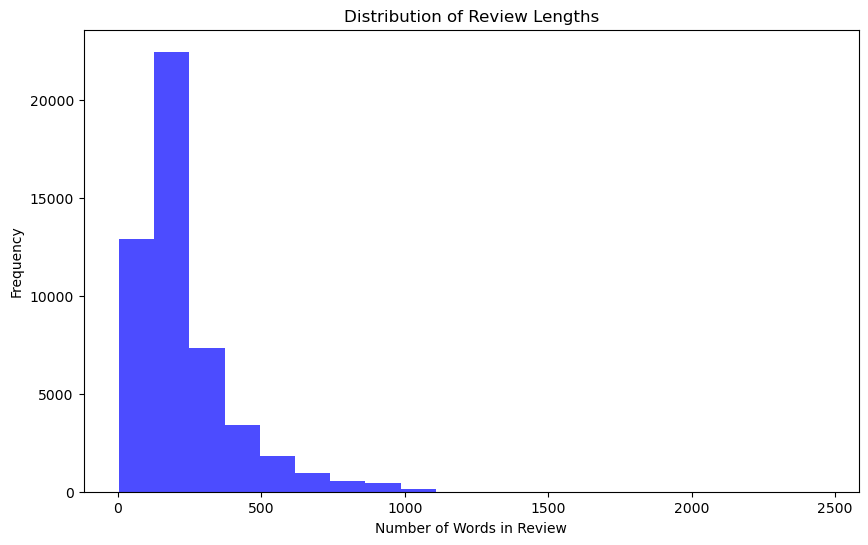

In [48]:
# 2. Review Length Analysis
df['Review Length'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(df['Review Length'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Step 2: Preprocessing the data
# Vectorize the text data (convert text to numerical form)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])  # 'Text' column for comments

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

In [50]:
# Step 4: Train the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [52]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["negative", "positive"])
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8528
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.88      0.86      5022
    positive       0.88      0.82      0.85      4978

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



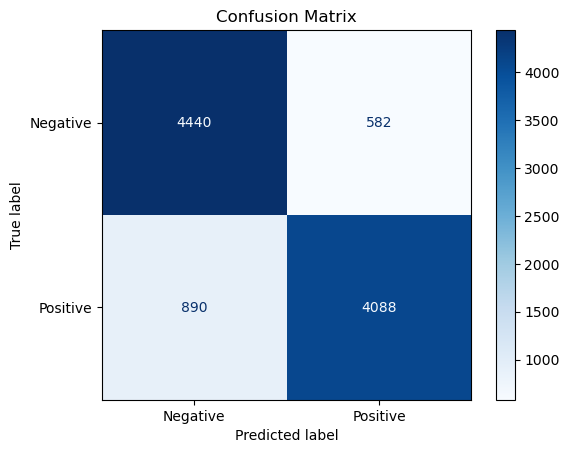

In [54]:
# Step 7: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Optional: Test with new, unseen comments and show sentiment scores between 0 and 1
new_comments = ["This movie is absolutely fantastic! The storyline is engaging, the characters are well-developed, and the performances are top-notch. I couldn't take my eyes off the screen. A must-watch for everyone!", "Deep Learning and Machine Learning are the subclasses of Machine Learning"]
#This model implies to movie reviews only for correct accuracy

new_comments_vectorized = vectorizer.transform(new_comments)
predictions_proba = model.predict_proba(new_comments_vectorized)  # Get probabilities

for comment, probs in zip(new_comments, predictions_proba):
    sentiment_score = probs[1]  # Probability of positive sentiment (class label '1')
    sentiment_label = "positive" if sentiment_score >= 0.5 else "negative"  # Determine sentiment label based on score
    print(f'Comment: {comment} -> Sentiment Score: {sentiment_score:.2f} ({sentiment_label})')

Comment: This movie is absolutely fantastic! The storyline is engaging, the characters are well-developed, and the performances are top-notch. I couldn't take my eyes off the screen. A must-watch for everyone! -> Sentiment Score: 0.91 (positive)
Comment: Deep Learning and Machine Learning are the subclasses of MAchine Learning -> Sentiment Score: 0.65 (positive)
